In [14]:
#Import statements including the ultra simple local projection package I developed
from scipy.stats import norm
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
from lppy import locproj

Text(0.5, 1.0, 'Constructed AR(1) series')

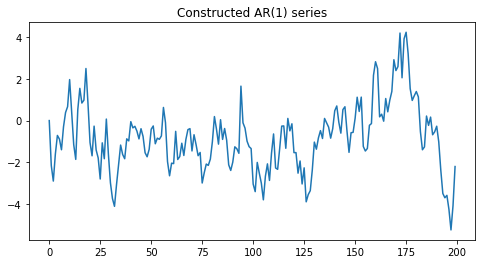

In [15]:
"""----------------------Objective -----------------------------
1. Generate a process from a known DGP
2. Estimate impulse responses to compare LP vs. AR estimation """

#Number of observations
T = 200

#Create a (1xT) shock vector for the time series
sigma = 1 #variance term
s = np.random.normal(0, sigma, T)

#Simulate an AR1 process
AR1 = np.empty(T)
AR1[0] = 0 
alpha = .8 #persistence term

for i in range(1,T):
    AR1[i] = alpha*AR1[i-1] + s[i]

#Plot the resulting series 
plt.plot(AR1)
plt.title("Constructed AR(1) series")

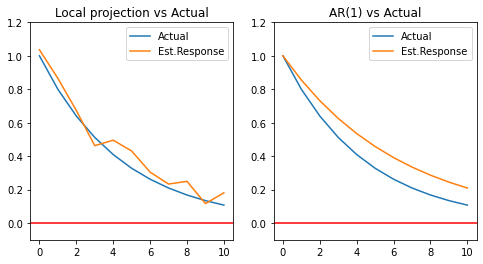

In [22]:
#Compare response using Local projection
fig, axs = plt.subplots(1,2)
plt.rcParams['figure.figsize'] = [8, 4]

#FIRST PLOT THE LP RESPONSE VS ACTUAL

irf = locproj(s,AR1,0,10,99)
#calculate the true response:
resp = np.power(alpha, irf.horizon)
axs[0].plot(resp,label="Actual") 
axs[0].plot(irf.resp,label='Est.Response')

axs[0].legend()
axs[0].set_title("Local projection vs Actual")  
axs[0].set_ylim(-.1,1.2)
axs[0].axhline(y = 0, color = 'red', linestyle = '-')

#Estimate the AR(1) response:
AR1_lag1 = np.roll(AR1, -1)
model = sm.OLS(AR1[1:T],AR1_lag1[1:T])
results = model.fit()
results.summary()
beta = results.params[0]

#Compute AR1 response
estimate = np.power(beta, irf.horizon)
axs[1].plot(resp,label="Actual") 
axs[1].plot(estimate,label='Est.Response')
axs[1].legend()
axs[1].set_title("AR(1) vs Actual")  
axs[1].set_ylim(-.1,1.2)
axs[1].axhline(y = 0, color = 'red', linestyle = '-')
